In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data=pd.read_csv("Mik_Pro.csv")
data.head(5)

,Year,Milk Production
0,1980,1620
1,1981,1899
2,1982,2015
3,1983,2096
4,1984,2110


In [3]:
data.tail(5)

,Year,Milk Production
38,2018,11655
39,2019,12024
40,2020,13703
41,2021,14304
42,2022,15041


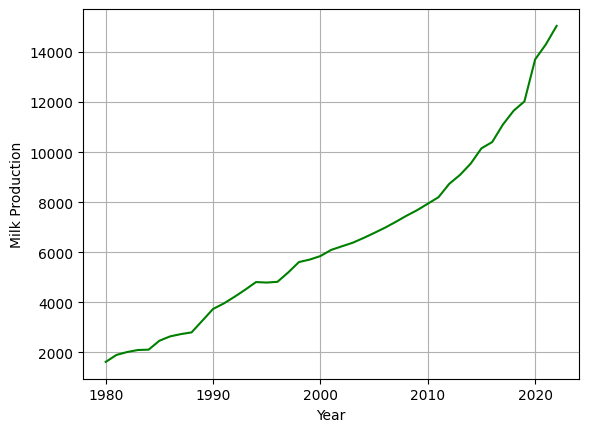

In [4]:
sns.lineplot(x="Year",y="Milk Production",data=data,color="green")
plt.grid(True)

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Year             43 non-null     int64
 1   Milk Production  43 non-null     int64
dtypes: int64(2)
memory usage: 820.0 bytes


In [7]:
data.describe()

,Year,Milk Production
count,43.000000,43.000000
mean,2001.000000,6513.837209
std,12.556539,3554.177749
min,1980.000000,1620.000000
25%,1990.500000,3845.500000
50%,2001.000000,6094.000000
75%,2011.500000,8466.500000
max,2022.000000,15041.000000


In [8]:
x=data[["Year"]]
y=data["Milk Production"]
x=ss.fit_transform(x)

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
def evaluate_models(x_train,x_test,y_train,y_test):
    models={
        "Linear Regression":LinearRegression(),
        "Decision Tree":DecisionTreeRegressor(),
        "Random Forest":RandomForestRegressor(),
        'K-Nearest Neighbors': KNeighborsRegressor()
    }
    
    results = {}  
    for name, model in models.items():
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        results[name] = {"MSE": mse, "Accuracy (RMSE)": r2*100}  


        param_grid = {
            "Lasso Regression": {"alpha": [0.1, 1.0, 10.0, 100.0]},
            "Ridge Regression": {"alpha": [0.1, 1.0, 10.0, 100.0]},
            "Elastic Net Regression": {"alpha": [0.1, 1.0, 10.0, 100.0], "l1_ratio": [0.1, 0.5, 0.9]},
              "MLP Regressor": {
            "hidden_layer_sizes": [(50,), (100,), (50, 50)],
            "activation": ['relu', 'tanh'],
            "solver": ['adam'],
            "alpha": [0.0001, 0.001]
        }
        }

    for name, model in param_grid.items():
        if name == "Lasso Regression":
            grid = GridSearchCV(Lasso(), model, cv=5, scoring="neg_mean_squared_error")
        elif name == "Ridge Regression":
            grid = GridSearchCV(Ridge(), model, cv=5, scoring="neg_mean_squared_error")
        elif name == "Elastic Net Regression":
            grid = GridSearchCV(ElasticNet(), model, cv=5, scoring="neg_mean_squared_error")
        elif name == "MLP Regressor":
            grid = GridSearchCV(MLPRegressor(max_iter=2000, learning_rate_init=0.001, random_state=42), model, cv=5, scoring="neg_mean_squared_error")

        grid.fit(x_train, y_train)
        best_model = grid.best_estimator_ 
        predictions = best_model.predict(x_test) 
        
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        results[name] = {"MSE": mse, "Accuracy (RMSE)": r2 * 100} 

    results_df = pd.DataFrame(results).T  
    return results_df 

results_df = evaluate_models(x_train, x_test, y_train, y_test)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterat

In [11]:
results_df

,MSE,Accuracy (RMSE)
Linear Regression,255019.062775,97.892344
Decision Tree,115689.777778,99.043859
Random Forest,61391.309778,99.492619
K-Nearest Neighbors,166075.937778,98.627432
Lasso Regression,254995.226878,97.892541
Ridge Regression,252744.311211,97.911144
Elastic Net Regression,248330.450911,97.947623
MLP Regressor,256438.284667,97.880614


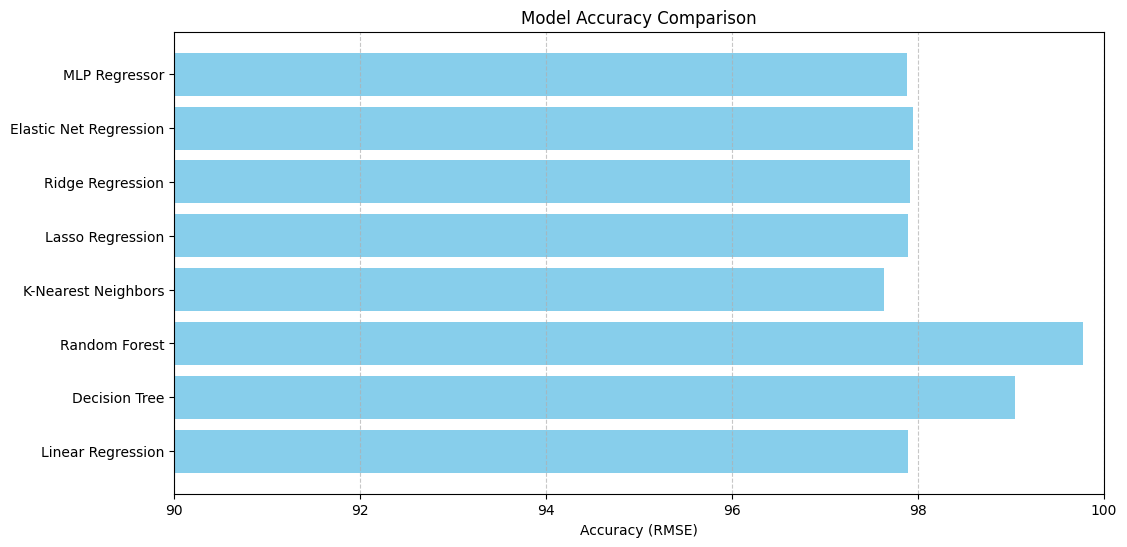

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Model": [
        "Linear Regression",
        "Decision Tree",
        "Random Forest",
        "K-Nearest Neighbors",
        "Lasso Regression",
        "Ridge Regression",
        "Elastic Net Regression",
        "MLP Regressor"
    ],
    "Accuracy (RMSE)": [
        97.892344,
        99.045716,
        99.776826,
        97.629483,
        97.892360,
        97.911144,
        97.947623,
        97.880320
    ]
}

results_df = pd.DataFrame(data)

plt.figure(figsize=(12, 6))
plt.barh(results_df['Model'], results_df['Accuracy (RMSE)'], color='skyblue')
plt.xlabel('Accuracy (RMSE)')
plt.title('Model Accuracy Comparison')
plt.xlim(90, 100) 
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


